# Preprocesamiento de datos

### Librerias

In [66]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

### Configuración visual

In [67]:
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

viridis = cm.get_cmap('viridis', 256)
magma = cm.get_cmap('magma', 256)
plasma = cm.get_cmap('plasma', 256)

### Carga de archivos

In [68]:
#Subimos el archivo csv a un dataframe
df = pd.read_csv(r"C:\Users\cmoli\OneDrive\Documentos\GitHub\nuevo-proyecto\data\all_month 1.csv")

In [69]:
#Leemos el archivo y comprobamos que se haya subido correctamente
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-02T02:50:02.380Z,33.912167,-117.070000,12.690000,0.89,ml,33.0,116.0,NaN,0.20,...,2025-05-02T02:53:47.574Z,"9 km S of Calimesa, CA",earthquake,0.31,1.31,0.167,28.0,automatic,ci,ci
1,2025-05-02T02:39:31.940Z,33.073667,-116.801333,9.340000,0.82,ml,5.0,168.0,0.1396,0.15,...,2025-05-02T02:42:55.817Z,"7 km ENE of Ramona, CA",earthquake,3.87,10.42,0.388,9.0,automatic,ci,ci
2,2025-05-02T02:36:43.010Z,59.731200,-151.989200,58.700000,1.90,ml,NaN,NaN,NaN,0.98,...,2025-05-02T02:38:45.940Z,"10 km WSW of Anchor Point, Alaska",earthquake,NaN,0.90,NaN,NaN,automatic,ak,ak
3,2025-05-02T02:33:57.040Z,33.815500,-116.828833,29.800000,1.17,ml,15.0,208.0,0.1857,0.17,...,2025-05-02T02:37:27.431Z,"10 km NE of Valle Vista, CA",earthquake,1.57,0.91,0.307,33.0,automatic,ci,ci
4,2025-05-02T02:32:14.770Z,19.569666,-155.366669,60.099998,2.63,ml,8.0,149.0,0.0935,0.32,...,2025-05-02T02:35:58.840Z,"19 km NW of Volcano, Hawaii",earthquake,2.98,4.89,0.730,4.0,automatic,hv,hv


### Preprocesamiento de datos

In [70]:
df.shape #dimensiones del dataframe

(10137, 22)

In [71]:
df.info() #informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10137 entries, 0 to 10136
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10137 non-null  object 
 1   latitude         10137 non-null  float64
 2   longitude        10137 non-null  float64
 3   depth            10137 non-null  float64
 4   mag              10137 non-null  float64
 5   magType          10137 non-null  object 
 6   nst              8661 non-null   float64
 7   gap              8661 non-null   float64
 8   dmin             8659 non-null   float64
 9   rms              10137 non-null  float64
 10  net              10137 non-null  object 
 11  id               10137 non-null  object 
 12  updated          10137 non-null  object 
 13  place            10137 non-null  object 
 14  type             10137 non-null  object 
 15  horizontalError  8046 non-null   float64
 16  depthError       10137 non-null  float64
 17  magError    

In [72]:
df.columns #columnas del dataframe

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [73]:
df.describe() #estadisticas del dataframe

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10137.000000,10137.000000,10137.000000,10137.000000,8661.000000,8661.000000,8659.000000,10137.000000,8046.000000,10137.000000,8644.000000,8660.000000
mean,38.731782,-106.940775,20.288255,1.519695,23.452719,111.266649,0.434701,0.258716,1.706322,2.186346,0.177142,19.206928
std,17.984444,73.009765,50.234703,1.279802,22.620950,64.132831,1.579085,0.271471,3.264264,5.142015,0.103722,33.116053
min,-65.172700,-179.930800,-3.410000,-1.320000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.531000,-146.793600,3.000000,0.720000,9.000000,64.000000,0.014770,0.080000,0.250000,0.450000,0.110000,7.000000
50%,38.811165,-121.076667,7.400000,1.260000,17.000000,94.000000,0.052140,0.160000,0.416988,0.720000,0.160000,12.000000
75%,51.276000,-115.607667,13.800000,1.970000,29.000000,146.000000,0.117050,0.330000,0.950000,1.643410,0.219056,22.000000
max,86.322700,179.999300,642.872000,6.900000,400.000000,359.000000,42.272000,3.830000,41.690000,68.600000,2.090000,802.000000


In [74]:
df.isnull().sum() #comprobamos si hay valores nulos en el dataframe

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1476
gap                1476
dmin               1478
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2091
depthError            0
magError           1493
magNst             1477
status                0
locationSource        0
magSource             0
dtype: int64

In [75]:
df.isnull().sum() / len(df) * 100 #comprobamos el porcentaje de valores nulos en el dataframe

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                14.560521
gap                14.560521
dmin               14.580251
rms                 0.000000
net                 0.000000
id                  0.000000
updated             0.000000
place               0.000000
type                0.000000
horizontalError    20.627405
depthError          0.000000
magError           14.728223
magNst             14.570386
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

<Axes: >

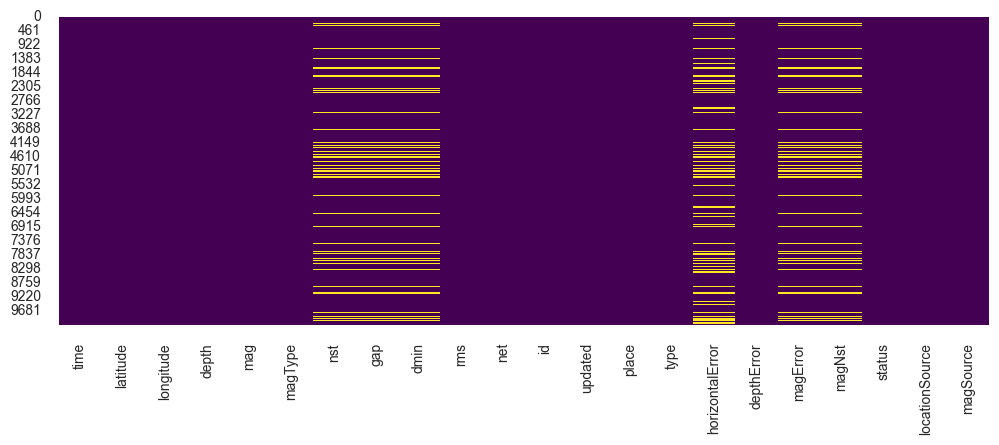

In [76]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualizamos los valores nulos en el dataframe

In [77]:
#convertir la columna time a datetime
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

In [78]:
#conversion de columnas nuevas 
df['año'] = df['time'].dt.year
df['mes'] = df['time'].dt.month
df['dia'] = df['time'].dt.day
df['hora'] = df['time'].dt.hour
df['dia_semana'] = df['time'].dt.day_name()
df['fecha'] = df['time'].dt.date
df['minuto'] = df['time'].dt.minute

In [79]:
#Categorizando la magnitud
df['mag_obj'] = pd.cut(df['mag'], bins=[0, 2, 4, 6, 8, 10], labels=['Bajo', 'Medio', 'Alto', 'Muy Alto', 'Extremo'], include_lowest=True)
#Categorizando la profundidad
df['depth_obj'] = pd.cut(df['depth'], bins=[0, 50, 100, 150, 200, 300], labels=['Superficial', 'Intermedia', 'Profunda', 'Muy Profunda', 'Extrema'], include_lowest=True)


### Reparación datos nulos

##### Observación: Teniendo en cuenta el elevado porcentaje de datos nulos y el tipo de datos que hay que reparar, vamos a reemplazarlos por "Sin datos" en vez de realizar una mediana, ya que este último podría afectar a los resultados.

In [80]:
df["nst"].fillna("Sin datos", inplace=True) #reemplazamos los valores nulos por "Sin datos" en la columna "nst"
df["gap"].fillna("Sin datos", inplace=True) #reemplazamos los valores nulos por "Sin datos" en la columna "gap"
df["dmin"].fillna("Sin datos", inplace=True) #reemplazamos los valores nulos por "Sin datos" en la columna "dmin"
df["horizontalError"].fillna("Sin datos", inplace=True) #reemplazamos los valores nulos por "Sin datos" en la columna "horizontalError"
df["magError"].fillna("Sin datos", inplace=True) #reemplazamos los valores nulos por "Sin datos" en la columna "magError"
df["magNst"].fillna("Sin datos", inplace=True) #reemplazamos los valores nulos por "Sin datos" en la columna "magNst"

In [81]:
df.isnull().sum() #comprobamos si hay valores nulos en el dataframe

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
status               0
locationSource       0
magSource            0
año                  0
mes                  0
dia                  0
hora                 0
dia_semana           0
fecha                0
minuto               0
mag_obj            637
depth_obj          372
dtype: int64

In [82]:
df.info() #informacion del dataframe limpio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10137 entries, 0 to 10136
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             10137 non-null  datetime64[ns]
 1   latitude         10137 non-null  float64       
 2   longitude        10137 non-null  float64       
 3   depth            10137 non-null  float64       
 4   mag              10137 non-null  float64       
 5   magType          10137 non-null  object        
 6   nst              10137 non-null  object        
 7   gap              10137 non-null  object        
 8   dmin             10137 non-null  object        
 9   rms              10137 non-null  float64       
 10  net              10137 non-null  object        
 11  id               10137 non-null  object        
 12  updated          10137 non-null  object        
 13  place            10137 non-null  object        
 14  type             10137 non-null  objec

In [83]:
#Creamos el dataset limpio en csv
df.to_csv(r'C:\Users\cmoli\OneDrive\Documentos\GitHub\nuevo-proyecto\data\dataset_limpio.csv', index=False)